# Linear Regression Basic Maths

### Linear Regression is a supervised machine learning algorithm. Which means it takes inputs and outputs to learn the relationship first. Afterwards it tries to predict the output for unknown input.

* To understand this concept mathematically we will take one dimensional example, i.e we will try to predict output for only one input. Yes, there can be more than one input for one output. 
* Lets say our input is X and ouput is y. So we can say that y = f(X). Here f(X) denotes the relation ship between X and y.
* Since we are taking one dimensional examples we can say that `y = mX + c`, where m and c are some constants. And if you remember this equation, it is just an equation of line where m is the slope and c is the bias of the line.
* So all we need to do is to figure out the values for these constants which approximately satisfies the inputs and output relationship.
* Linear regression is all about how to calculate this values. Lets get into some maths now.

### Step 1: 

Lets generate some sample data (inputs and outputs) using numpy.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import random

%matplotlib inline

In [2]:
X_data = np.linspace(0, 10, 10) + np.random.uniform(-1, 1, 10)

X_data

array([-0.47496917,  1.16627136,  2.47164763,  3.28896999,  3.86730449,
        4.62994414,  6.52723543,  8.26285891,  9.79939961, 10.89181742])

In [3]:
y_data = np.linspace(0, 10, 10) + np.random.uniform(-1, 1, 10)

y_data

array([-0.99329794,  1.82209951,  1.29707809,  3.46806809,  4.82528922,
        4.87247585,  6.36172849,  8.77192543,  8.47538432, 10.25735559])

Text(0, 0.5, 'outputs')

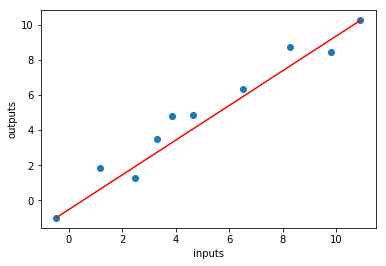

In [4]:
plt.scatter(X_data, y_data)
plt.plot([X_data[0], X_data[-1]], [y_data[0], y_data[-1]], color='r')
plt.xlabel('inputs')
plt.ylabel('outputs')

#### I plotted the data as well as drawn a hypothetical line passing through this data. This line is not the final result yet. I am just connecting first and last point in graph. This line is just to visualize how we are going to solve this problem.
#### We need to draw a line such that average of sum of distances between each point and line is minimum. This is because for a value of X we need as close approximation to the y as possible.

### Step 2:
* We need to calculate `m` and `c`. But initially we have none of these values. We only have `X` and `y`. The question is what should be the initial values for `m` and `c` since we dont have anything. 
* We can start with random values.
* Or we can start by calculating these values from above line by following equations.

$m = \frac{y_2 - y_1}{x_2 - x_1}$

$c = y - mx$

* But for simplicity let's just initialize with random variables.

In [5]:
m = random.random()
c = random.random()

m, c

(0.671424519870409, 0.24723785696118739)

## Let's visualize the line by putting above variable in the equation `y = mX+c`.

In [6]:
yhat = m*X_data + c

yhat

array([-0.07166809,  1.03030105,  1.90676268,  2.45553295,  2.84384091,
        3.35589588,  4.62978377,  5.79512394,  6.82679504,  7.56027114])

Text(0, 0.5, 'outputs')

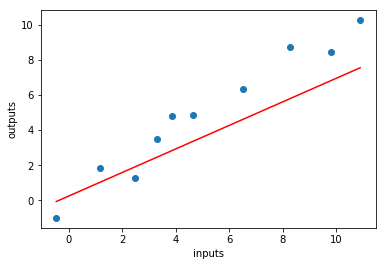

In [7]:
plt.scatter(X_data, y_data)
plt.plot(X_data, yhat, color='r')
plt.xlabel('inputs')
plt.ylabel('outputs')

### Here `yhat` is the hypothesis or predicted value. We can see that this line is far from predicting correct value. Now we need to figure out a way to change `m` and `c` to bring this line more close to the points.

* Let's calculate the difference between predicted values `yhat` and actual values `y`. This is called the `error`. This will let us know how much farther away we are from the goal.
* For optimization results we calculate the half of mean of square of differences between the `yhat` and `y`. This is called mean squared error function or cost function. Mathematically it can be represented as follows.

$costfunction = \frac{\sum_{i=1}^{n}(yhat_{i} - y_{i})^{2}}{2n}$, where n is the number of data.

* We just need to minimize this error or cost. In other words we need to reduce the values to as close to 0 as possible.
* Since everything else is constant we can only change the `yhat` value.
* But `yhat = m*X + c`. So if we replace yhat in above equation we get following equation.

$costfunction = \frac{\sum_{i=1}^{n}((m*X + c) - y_{i})^{2}}{2n}$

* Hence to minimize the above equation we need to tweak the values of `m` and `c` (`X` is constant as well).

# Graph for Cost Function

<span style="display:inline-block"><img src="cost_function.png" width=400/></span>

### Step 3:
* To minimize the cost function. we will use Gradient Descent algorithm. 
* In this algorithm, the gradient of the cost function with respect to the cause of the error is calculated. This gradient value will then be subtracted from the cause of the error which are `m` and `c`. This process will continue until we reduce the cost to nearly 0.
* This does not necessarily mean that the values of `m` and `c` will also be reduced. The gradient is nothing but slope of the line (differentiation) or plane of the cost function which can be negative or positive.
* Following equation represent the calculation to tweak the values of `m` and `c`

$m = m - \alpha\frac{d}{d_m}C(m, c)$

$c = c - \alpha\frac{d}{d_c}C(m, c)$

where $C(m, c) = \frac{\sum_{i=1}^{n}((m*X + c) - y_{i})^{2}}{2n}$

**Solving the above equations, we get following formulas**

$m = m - \alpha\frac{\sum_{i=1}^{n}((m*X + c) - y_{i})x_i}{n}$

$c = c - \alpha\frac{\sum_{i=1}^{n}((m*X + c) - y_{i})x_i}{n}$

* Here $\alpha$ is learning rate which controls the rate of change of values of `m` and `c`.
* Now, let's implement this in code.

## The above process can be visualized as follows

<span style="display:inline-block"><img src="cost_function.gif" width=400/></span>

#### Here, we can say that X is m, Y is c and Z is C(m, c)

In [8]:
alpha = 0.03
m_1 = m
c_1 = c

def calculate_yhat(m, x, c):
    return c + m*x

def calculate_gradient_for_c(c, yhat, y, alpha):
    return c - alpha*(np.sum(yhat-y)/len(y))

def calculate_gradient_for_m(m, yhat, x, y, alpha):
    return m - alpha*((np.sum((yhat-y)*x))/len(y))

def cost_function(y, yhat):
    return np.mean((yhat-y)**2)/2

yhat = calculate_yhat(m_1, X_data, c_1)
cost = cost_function(y_data, yhat)

iteration = 0

while cost >= 0.1 and iteration < 500:
    m_1 = calculate_gradient_for_m(m_1, yhat, X_data, y_data, alpha)
    c_1 = calculate_gradient_for_c(c_1, yhat, y_data, alpha)
    yhat = calculate_yhat(m_1, X_data, c_1)
    cost = cost_function(y_data, yhat)
    iteration += 1

print("cost => " + str(cost))
print("m => " + str(m_1))
print("c => " + str(c_1))

cost => 0.24993490470449156
m => 0.9458097135951038
c => 0.1463738060946716


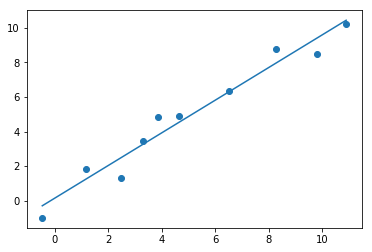

In [9]:
plt.scatter(X_data, y_data)
plt.plot(X_data, yhat)